In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ipywidgets import interact

In [273]:
pd.set_option('display.max_colwidth', None)

In [274]:
data_dir = '../data/'

In [275]:
df_2021 = pd.read_csv(data_dir + '2021_rws.csv', encoding='cp1252')

In [276]:
df_2021.shape

(1512, 109)

In [277]:
column_name_trimmed = { k : k.strip() for k in df_2021.columns}

In [278]:
df_2021.rename(column_name_trimmed, axis=1, inplace=True)

### Exploring some basic elements of the person responding and their company

This aids in gettings a sense of who is responding to this survey before diving into questions centered around remote working habits

In [279]:
demographics_rename_map = {
    'What is your gender?' : 'gender',
    'How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.' : 'tenure',
    'Which of the following best describes your industry?' : 'industry_1',
    'Do you manage people as part of your current job?' : 'manager',
    'Which of the following best describes your household?' : 'household',
    'Metro or Regional' : 'metro',
    'How many people are currently employed by your organisation?' : 'company_size'
    
}

In [280]:
df_2021.rename(demographics_rename_map, axis=1, inplace=True)

In [281]:
df_2021['age'] = 2021 - df_2021['What year were you born?']

### **Age**

In [282]:
df_2021['age'].isnull().sum()

0

In [283]:
df_2021['age'].describe()

count    1512.000000
mean       41.773810
std        11.836707
min        19.000000
25%        32.000000
50%        41.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### **Gender**

In [284]:
df_2021['gender'].isnull().sum()

0

In [285]:
df_2021['gender'].unique()

array(['Male', 'Female', 'I would rather not say', 'Other'], dtype=object)

### **Industry (High level)**

In [286]:
df_2021['industry_1'].isnull().sum()

0

In [287]:
df_2021['industry_1'].unique()

array(['Other Services', 'Construction', 'Financial and Insurance',
       'Health Care and Social Assistance', 'Manufacturing',
       'Public Administration and Safety', 'Administrative and Support',
       'Electricity, Gas, Water and Waste',
       'Professional, Scientific and Technical', 'Education and Training',
       'Retail Trade', 'Accommodation and Food', 'Wholesale Trade',
       'Information Media and Telecommunications',
       'Rental, Hiring and Real Estate',
       'Transport, Postal and Warehousing',
       'Agriculture, Forestry and Fishing', 'Arts and Recreation',
       'Mining'], dtype=object)

### **Location: Metro or Regional**

Metro : City and inner city suburbs
Regional : Rural and country suburbs

https://www.acnpacific.com/knowledge-base/what-is-the-difference-between-metro-and-regional-plans/

In [288]:
df_2021['metro'].isnull().sum()

0

In [289]:
df_2021['metro'].unique()

array(['Metro', 'Regional'], dtype=object)

In [290]:
df_2021['metro'] = np.where(df_2021['metro'] == 'Metro', 1, 0)

In [291]:
df_2021['metro'].unique()

array([1, 0])

In [292]:
df_2021['metro'].mean()

0.7665343915343915

### **Is the responder a manager?**

In [293]:
df_2021['manager'].isnull().sum()

0

In [294]:
df_2021['manager'].unique()

array(['No', 'Yes'], dtype=object)

In [295]:
df_2021['manager'] = np.where(df_2021['manager'] == 'Yes', 1, 0)

In [296]:
df_2021['manager'].mean()

0.460978835978836

### **Household Environment**

In [297]:
df_2021['household'].isnull().sum()

0

In [298]:
df_2021['household'].unique()

array(['Couple with dependent children',
       'Couple with no dependent children', 'Single person',
       'One parent family with dependent children', 'Group household',
       'Other one family household', 'Multiple family household'],
      dtype=object)

### **Company size**

In [299]:
df_2021['company_size'].isnull().sum()

0

In [300]:
df_2021['company_size'].unique()

array(['More than 200', 'Between 20 and 199', 'Between 5 and 19',
       'Between 1 and 4', 'I am a sole trader/owner-operator'],
      dtype=object)

In [301]:
company_size_map = {
    'More than 200' : '200+',
    'Between 20 and 199' : '20-199',
    'Between 5 and 19' : '5-19',
    'Between 1 and 4': '1-4',
    'I am a sole trader/owner-operator' : '1'
}

In [302]:
df_2021['company_size'] = df_2021['company_size'].replace(company_size_map)

In [303]:
df_2021['company_size'].unique()

array(['200+', '20-199', '5-19', '1-4', 'self'], dtype=object)

### Length of Time at Company

In [307]:
df_2021['tenure'].isnull().sum()

0

In [308]:
df_2021['tenure'].unique()

array(['More than 5 years', 'Between 6 and 12 months',
       'Between 1 and 5 years'], dtype=object)

## Visualizing Demographic Data

### Personal and family data

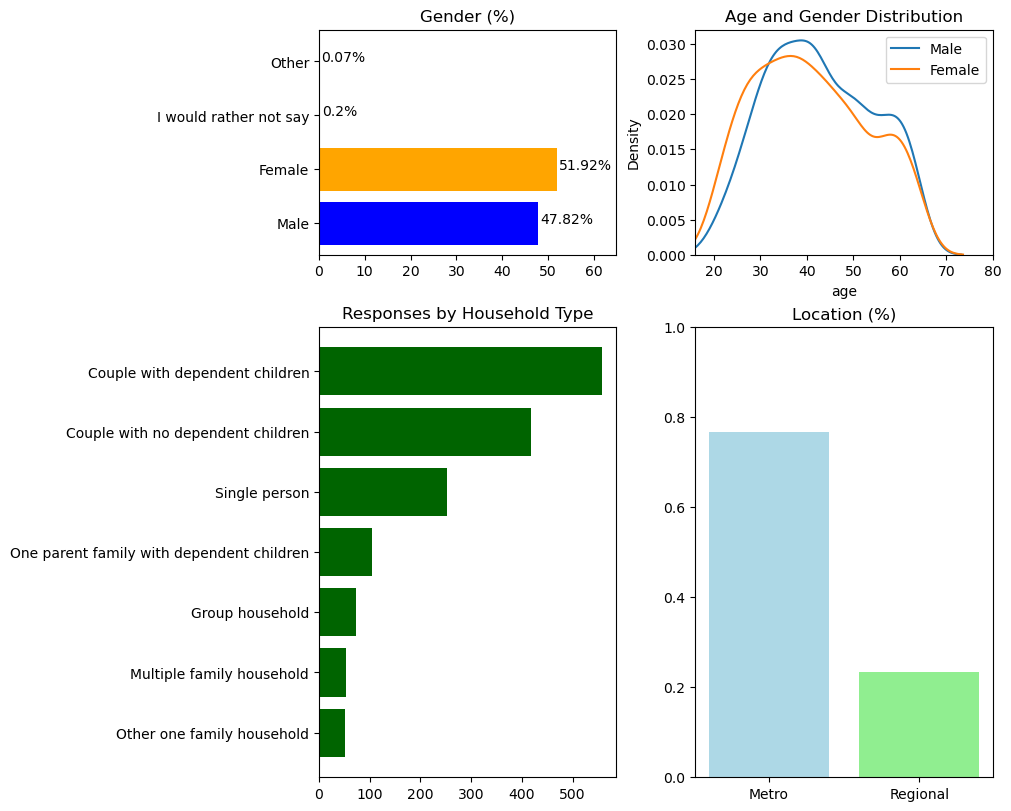

In [317]:

fig, axs = plt.subplot_mosaic([['a', 'b'],
                               ['c', 'd'],
                               ['c', 'd']
                              ], layout='constrained')
fig.set_figheight(8)
fig.set_figwidth(10)

# Subplot A - Horizontal bar chart (Gender proportion)
gender_widths = [ round(df_2021[df_2021['gender'] == i].shape[0] / df_2021.shape[0] * 100, 2) for i in df_2021['gender'].unique()]

axs['a'].set_title("Gender (%)")
axs['a'].barh( list(df_2021['gender'].unique()), gender_widths, color = ['blue', 'orange', 'green', 'pink'])
axs['a'].set_xlim(0, max(gender_widths) + max(gender_widths)*0.25)

for i in range(len(gender_widths)):
    axs['a'].text(x = gender_widths[i]+0.5, y = list(df_2021['gender'].unique())[i], s = str(gender_widths[i]) + '%')

# Subplot B - Density plot (Age and Gender distribution)
sns.kdeplot(df_2021[df_2021['gender'] == 'Male']['age'], label = 'Male', ax=axs['b'] )
sns.kdeplot(df_2021[df_2021['gender'] == 'Female']['age'], label = 'Female', ax=axs['b'] )
axs['b'].set_xlim(16, 80)
axs['b'].legend()
axs['b'].set_title("Age and Gender Distribution")

# Subplot C - Horizontal bar chart (Household)

inverse_household = { df_2021[df_2021['household'] == k].shape[0] : k   for k in df_2021['household'].unique()}
sorted_household = {inverse_household[v] : v for v in sorted(inverse_household)}
axs['c'].barh( list(sorted_household.keys()) , sorted_household.values(), height = 0.8, color = 'darkgreen')
axs['c'].set_title('Responses by Household Type')


# Subplot D - Vertical bar chart (Metro vs regional)

axs['d'].bar(['Metro', 'Regional' ], height= [df_2021['metro'].mean(), 1 - df_2021['metro'].mean()], color = ['lightblue', 'lightgreen'])
axs['d'].set_ylim(0, 1)
axs['d'].set_title("Location (%)");



### Company Details

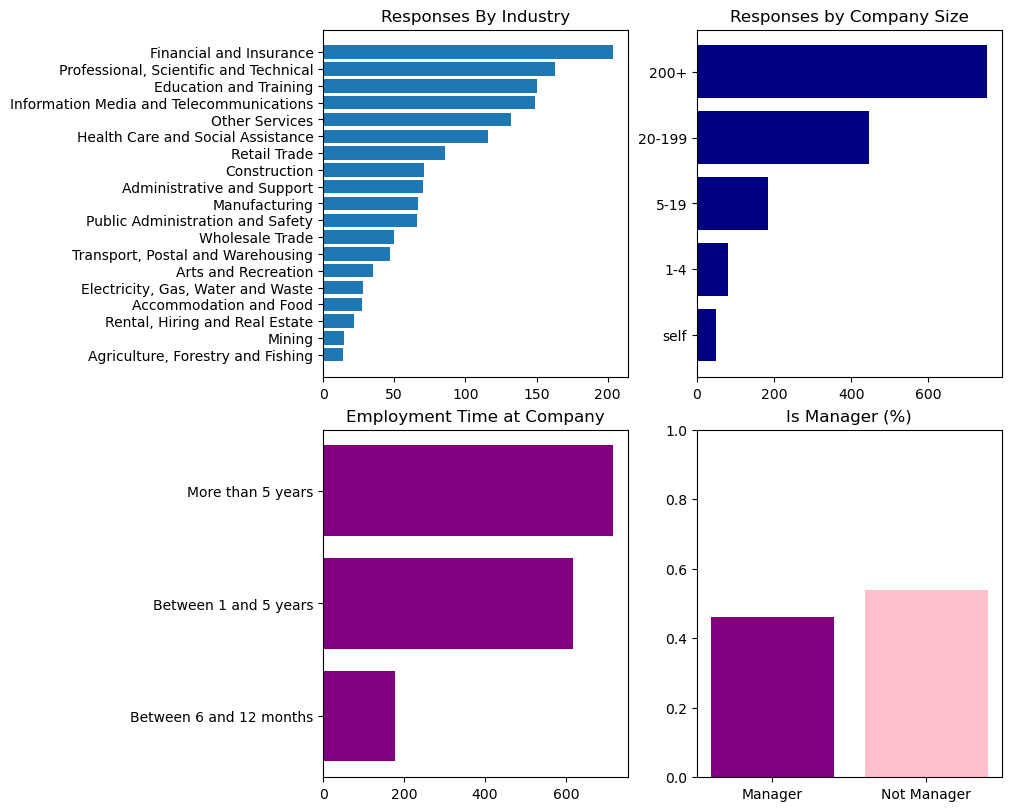

In [321]:
fig, axs = plt.subplot_mosaic([['d', 'e'],
                               ['d', 'e'],
                               ['f', 'g'],
                               ['f','g']
                              ], layout='constrained')
fig.set_figheight(8)
fig.set_figwidth(10)

# Subplot D - Horizontal bar chart (Respondents count by industry)

ind = { industry : df_2021[df_2021['industry_1'] == industry].shape[0] for industry in df_2021['industry_1'].unique()}

inverse_ind = {v:k for (k,v) in ind.items()}
sorted_ind = { inverse_ind[i] : i for i in sorted(inverse_ind)}

axs['d'].barh(list(sorted_ind.keys()), width = sorted_ind.values(), height = 0.8)
axs['d'].set_title('Responses By Industry');

# Subplot E - Horizontal bar chart (Company Size)
inverse_company = { df_2021[df_2021['company_size'] == k].shape[0] : k for k in df_2021['company_size'].unique() }
sorted_companies = {inverse_company[v] : v for v in sorted(inverse_company)}
axs['e'].barh( list(sorted_companies.keys()), 
              sorted_companies.values(),
             height = 0.8,
             color = 'navy')
axs['e'].set_title('Responses by Company Size')



#Subplot F - Horizontal bar cahrt (Respondents by length of time at company)

inverse_tenure = { df_2021[df_2021['tenure'] == k].shape[0] : k for k in df_2021['tenure'].unique() }
sorted_tenure = {inverse_tenure[v] : v for v in sorted(inverse_tenure)}
axs['f'].barh( list(sorted_tenure.keys()) , sorted_tenure.values(), height = 0.8, color = 'purple')
axs['f'].set_title("Employment Time at Company")

# Subplot G - Vertical bar chart (Manager or not)

axs['g'].bar(['Manager', 'Not Manager' ], height= [df_2021['manager'].mean(), 1 - df_2021['manager'].mean()], color = ['purple', 'pink'])
axs['g'].set_ylim(0, 1)
axs['g'].set_title("Is Manager (%)");